# Gradient Descent

Gradient descent is an iterative optimization algorithm for determining the local minimum of a differentiable function.

For a function _f_, the gradient of _f_ with respect to the independent variables gives the direction in which _f_ increases the fastest.  By taking steps opposite to the gradient, one can iteratively move towards lower and lower values until one reaches the minimum of _f_ (ideally).

In [1]:
from IPython.display import Image
Image(url='http://blog.datumbox.com/wp-content/uploads/2013/10/gradient-descent.png') 

For an _f(x)_ that depends on only one variable:
* choose a starting point, $x_0$
* take a step towards a new $x$:
  * $x_{n+1} = x_{n} - \eta*df/dx$
  * here, $\eta$ is a user-chosen step size and $df/dx$ is the 1D gradient of f (i.e., the derivative)
* continue until the value of _f(x)_ stops changing within some low tolerance

In [11]:
import numpy as np
from ipywidgets import interactive, interact, interactive_output
from ipywidgets import fixed, VBox, HBox, jslink, Play, FloatSlider, IntSlider
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return np.exp(-x) * np.sin(5 * x)
def df(x):
    return -np.exp(-x) * np.sin(5 * x) + 5 * np.cos(5 *x) * np.exp(-x)

In [4]:
x = np.linspace(0.5, 5.5, 500)
y = f(x)

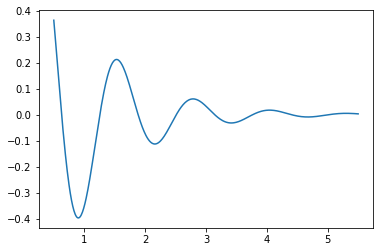

In [5]:
plt.plot(x,y);

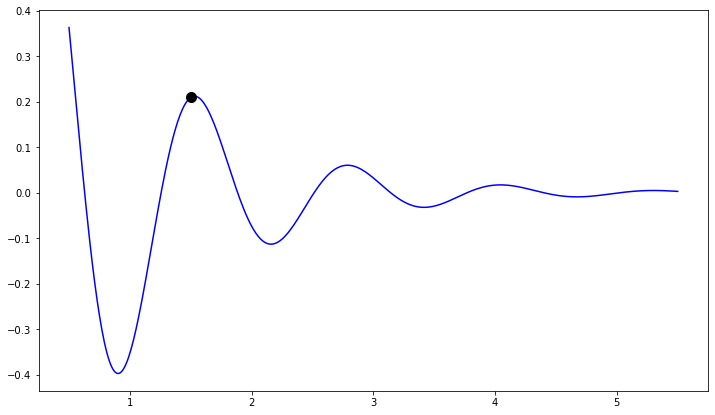

In [6]:
fig = plt.figure(figsize=(12,7))
curve = plt.plot(x, y, 'b-')
points = plt.plot(x[100],y[100],'ko',markersize=10)

In [7]:
def gradient_descent(x0, eta=.1, tol=1e-6, num_iters=10):
    xtheory = np.linspace(0.5, 5.5, 500)
    ytheory = f(xtheory)
    x = [x0]
    i = 0

    fig = plt.figure(figsize=(12,7))
    curve = plt.plot(xtheory, ytheory, 'b-')
    plt.plot(x[-1],f(x[-1]),'ko',markersize=10)
    while i < num_iters:
        x_prev = x[-1]
        grad = df(x_prev)
        x_curr = x_prev - eta * grad
        x.append(x_curr)
        if f(x_curr) > 10:
            break
        plt.plot(x_curr,f(x_curr),'ko',markersize=10)
        
        if np.abs(x_curr - x_prev) < tol:
            break
        i += 1
    
    fig.show()

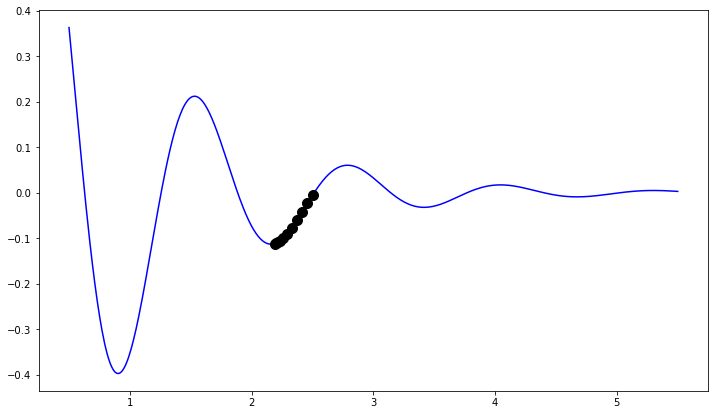

In [8]:
gradient_descent(2.5, eta=.1, tol=1e-6, num_iters=10)

In [9]:
interactive(gradient_descent,x0=(0.5,5.5),num_iters=(0,20))

interactive(children=(FloatSlider(value=3.0, description='x0', max=5.5, min=0.5), FloatSlider(value=0.1, descr…

In [12]:
interactive(gradient_descent,
                       x0=FloatSlider(value=2,min=0.5,max=5.5),
                       num_iters=IntSlider(value=0,min=0,max=20),
                       eta=FloatSlider(value=0.1,min=0.01,max=1.0,step=0.01),
                       tol=fixed(1e-6))

interactive(children=(FloatSlider(value=2.0, description='x0', max=5.5, min=0.5), FloatSlider(value=0.1, descr…

In [38]:
a = FloatSlider(value=2,min=0.5,max=5.5)
b = IntSlider(value=0,min=0,max=50)
c = FloatSlider(value=0.1,min=0.01,max=2.0,step=0.01)
interact(gradient_descent,
                       x0 = a,
                       num_iters = b,
                       eta = c,
                       tol=fixed(1e-6))
def achanged(change):
    b.value = 0
a.observe(achanged,'value')

def cchanged(change):
    b.value = 0
c.observe(cchanged,'value')

interactive(children=(FloatSlider(value=2.0, description='x0', max=5.5, min=0.5), FloatSlider(value=0.1, descr…

In [88]:
def gradient_descent_2(x0, eta=.1, tol=1e-6, num_iters=10):
    xtheory = np.linspace(0.5, 3, 300)
    ytheory = f(xtheory)
    x = [x0]
    i = 0

    fig = plt.figure(figsize=(12,7))
    curve = plt.plot(xtheory, ytheory, 'b-')
    plt.plot(x[-1],f(x[-1]),'ko',markersize=10)
    while i < num_iters:
        x_prev = x[-1]
        grad = df(x_prev)
        x_curr = x_prev - eta * grad
        x.append(x_curr)
        if f(x_curr) > 10:
            break
        plt.plot(x_curr,f(x_curr),'ko',markersize=10)
        plt.plot([x_prev,x_curr],[f(x_prev),f(x_curr)],'k--')
        
        if np.abs(x_curr - x_prev) < tol:
            break
        i += 1
    
    fig.show()

In [91]:
a = FloatSlider(value=2,min=0.5,max=3,description='x0')
b = IntSlider(value=0,min=0,max=50,description='num_iters')
c = FloatSlider(value=0.1,min=0.01,max=2.0,step=0.01,description='eta')
controls = VBox([a,b,c])
plotwidget = interactive_output(gradient_descent_2, {
                       'x0':a,
                       'num_iters':b,
                       'eta':c,
                       'tol':fixed(1e-6)});
def achanged(change):
    b.value = 0
a.observe(achanged,'value')

def cchanged(change):
    b.value = 0
c.observe(cchanged,'value')

play = Play(value=0,min=0,max=1000,step=1,interval=1000,description="Press play",disabled=False)
jslink((play, 'value'), (b, 'value'))
gradmov = VBox([controls,plotwidget,play])

display(gradmov)